# Create a Pandas DataFrame from the tweets data

In [1]:
import os
import json
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


#list the files
filelist = os.listdir('../movie_tweets') 

tweets = pd.DataFrame()

for file in filelist:
    if file == ".DS_Store":
        continue
        
        #create a list to hold the tweets
    raw_data = []

    #create and open the new file
    tweets_file = open('../movie_tweets/'+file, "rb")

    #append to the tweets list from the raw data file
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            raw_data.append(tweet)
        except:
            continue       
    print "Number of tweets for " + file + " - ", len(raw_data)
    

    
    
    
    
    tempDF = pd.DataFrame()
    #removed u'possibly_sensitive', at the moment since not all rows have it
    #it goes between place and retweet_count in the below list
    twitter_fields = [u'contributors', u'coordinates', u'created_at', u'entities', 
                      u'favorite_count', u'favorited',  u'geo', u'id',
                      u'id_str', u'in_reply_to_screen_name', u'in_reply_to_status_id', 
                      u'in_reply_to_status_id_str', u'in_reply_to_user_id', u'in_reply_to_user_id_str', 
                      u'lang', u'place',   u'retweet_count', u'retweeted', u'source', 
                      u'text', u'truncated', u'user']

    #set the columns in the dataframe to match the json fields of the twitter streaming api
    for t in twitter_fields:
        tempDF[t] = map(lambda tweet: tweet[t] if tweet[t] else 'None', raw_data)
    tempDF['followers_count'] = map(lambda tweet: tweet['user']['followers_count'] if tweet['user'] != None else None, raw_data)
    tempDF['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, raw_data)
    
    
    
    tempDF['movie'] = file

    tweets = tweets.append(tempDF)

Number of tweets for aceventura_tweets.txt -  37
Number of tweets for Assassins_tweets.txt -  634
Number of tweets for balto_tweets.txt -  2527
Number of tweets for casino_tweets.txt -  328
Number of tweets for cityoflostchildren_tweets.txt -  128
Number of tweets for copycat_tweets.txt -  251
Number of tweets for cutthroatisland_tweets.txt -  24
Number of tweets for dracula_tweets.txt -  22
Number of tweets for getshorty_tweets.txt -  10424
Number of tweets for LeavingLasVegas_tweets.txt -  619
Number of tweets for moneytrain_tweets.txt -  6108
Number of tweets for nixon_tweets_weak.txt -  85
Number of tweets for nowandthen_tweets.txt -  480
Number of tweets for othello_tweets.txt -  17
Number of tweets for Persuasion_tweets.txt -  19
Number of tweets for Powder_tweets.txt -  62
Number of tweets for senseandsensibility_tweets.txt -  717
Number of tweets for starwars_tweets.txt -  120761
Number of tweets for thehungergames_tweets.txt -  145977


In [2]:
print len(tweets)
tweets.head()


289220


,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,place,retweet_count,retweeted,source,text,truncated,user,followers_count,country,movie
0,None,None,Tue Dec 15 15:37:24 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",None,None,None,676788152732815361,676788152732815361,None,...,None,None,None,"<a href=""http://twittbot.net/"" rel=""nofollow"">...",Ace Ventura: When Nature Calls #fullmovie ▶ ht...,None,"{u'follow_request_sent': None, u'has_extended_...",8,None,aceventura_tweets.txt
1,None,None,Tue Dec 15 12:57:24 +0000 2015,"{u'symbols': [], u'user_mentions': [{u'indices...",None,None,None,676747887724748800,676747887724748800,HANUM_movie,...,None,None,None,"<a href=""http://twittbot.net/"" rel=""nofollow"">...",@HANUM_movie Ace Ventura: When Nature Calls fu...,None,"{u'follow_request_sent': None, u'has_extended_...",2,None,aceventura_tweets.txt
2,None,None,Tue Dec 15 01:51:14 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",None,None,None,676580243134480386,676580243134480386,None,...,None,None,None,"<a href=""http://twitter.com/#!/download/ipad"" ...",Ace Ventura: When Nature Calls Soundtrack - An...,None,"{u'follow_request_sent': None, u'has_extended_...",42,None,aceventura_tweets.txt
3,None,None,Tue Dec 15 00:36:29 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",None,None,None,676561431479762944,676561431479762944,None,...,None,None,None,"<a href=""http://127.0.0.1"" rel=""nofollow"">Lili...","""Ace Ventura - When Nature Calls"" (1995) is an...",None,"{u'follow_request_sent': None, u'has_extended_...",120,None,aceventura_tweets.txt
4,None,None,Mon Dec 14 04:34:15 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",None,None,None,676258878611431424,676258878611431424,None,...,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",#PostYourFavoriteStarWarsCharacter Is Jim Carr...,None,"{u'follow_request_sent': None, u'has_extended_...",665,None,aceventura_tweets.txt


# Do an initial analysis of the data

In [3]:
#View the first 5 tweets of the dataset
pd.set_option('max_colwidth', 200)
tweets['text'].head()

0                    Ace Ventura: When Nature Calls #fullmovie ▶ https://t.co/rITr6ycrve #myfirsttweet nederland xvideos
1                                       @HANUM_movie Ace Ventura: When Nature Calls full movie ▶ https://t.co/o8Ho1AGqqe
2                              Ace Ventura: When Nature Calls Soundtrack - Angelique Kidjo - Ife https://t.co/yNEarNDNrO
3                         "Ace Ventura - When Nature Calls" (1995) is an annoying movie (D) #DallasCritic &lt;nzdj0h&gt;
4    #PostYourFavoriteStarWarsCharacter Is Jim Carrey's best performance in THE MASK or ACE VENTURA WHEN NATURE CALLS???
Name: text, dtype: object

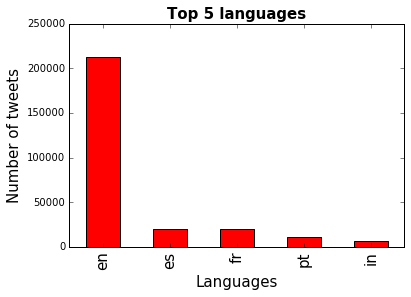

In [4]:
#view the top 5 languages present in the dataset
tweets_by_lang = tweets['lang'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

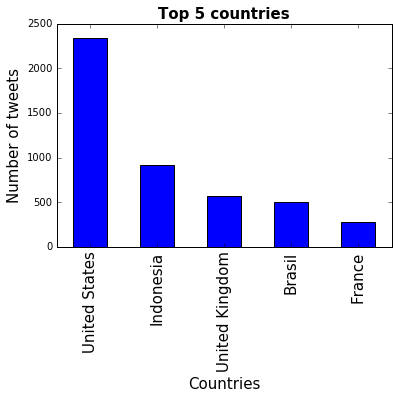

In [5]:
#view the top 5 countries in the dataset - not many rows had a value for this field
tweets_by_country = tweets['country'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [6]:
#we filter out languages other than English
tweets = pd.DataFrame(tweets[tweets['lang'] == 'en'])

print tweets['text'].head()
print "\n"
print "There are", len(tweets), 'tweets in English'

0                    Ace Ventura: When Nature Calls #fullmovie ▶ https://t.co/rITr6ycrve #myfirsttweet nederland xvideos
1                                       @HANUM_movie Ace Ventura: When Nature Calls full movie ▶ https://t.co/o8Ho1AGqqe
2                              Ace Ventura: When Nature Calls Soundtrack - Angelique Kidjo - Ife https://t.co/yNEarNDNrO
3                         "Ace Ventura - When Nature Calls" (1995) is an annoying movie (D) #DallasCritic &lt;nzdj0h&gt;
4    #PostYourFavoriteStarWarsCharacter Is Jim Carrey's best performance in THE MASK or ACE VENTURA WHEN NATURE CALLS???
Name: text, dtype: object


There are 212200 tweets in English


In [7]:
import re
#create a function to find the word in the tweet text field
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

# Pass the data with to Spark for text processing

In [8]:
from pattern.en import parse
from pattern.en import pprint
from pattern.vector import stem, PORTER, LEMMA
from sklearn.feature_extraction import text
from gensim import corpora 

In [9]:
import findspark
findspark.init()
print findspark.find()

/usr/local/Cellar/apache-spark/1.5.2/libexec/


In [10]:
import pyspark

In [11]:
def get_parts(thetext, punc='.,;:!?()[]{}`''\"@#$^&*+-|=~_'):
    # generate stopwords list & regexes for 2+ periods or 2+ dashes
    stop = text.ENGLISH_STOP_WORDS
    regex1=re.compile(r"\.{2,}")
    regex2=re.compile(r"\-{2,}")
    thetext=re.sub(regex1, ' ', thetext)
    thetext=re.sub(regex2, ' ', thetext)
    punctuation = list(punc)
    nouns=[]
    descriptives=[]
    for i,sentence in enumerate(parse(thetext, tokenize=True, lemmata=True).split()):
        nouns.append([])
        descriptives.append([])
        for token in sentence:
            if len(token[4]) >0:
                if token[1] in ['JJ', 'JJR', 'JJS']:
                    if token[4] in stop or token[4][0] in punctuation or token[4][-1] in punctuation or len(token[4])==1:
                        continue
                    descriptives[i].append(token[4])
                elif token[1] in ['NN', 'NNS']:
                    if token[4] in stop or token[4][0] in punctuation or token[4][-1] in punctuation or len(token[4])==1:
                        continue
                    nouns[i].append(token[4])
    out=zip(nouns, descriptives)
    nouns2=[]
    descriptives2=[]
    for n,d in out:
        if len(n)!=0 and len(d)!=0:
            nouns2.append(n)
            descriptives2.append(d)
    return nouns2, descriptives2

In [12]:
# initialize Spark context
conf = pyspark.SparkConf().setAppName("Twitter_Movies").setMaster("local[*]")
sc = pyspark.SparkContext(conf=conf)

In [13]:
# get tweets from text file
#text_lines = sc.textFile('tweets_all@#_7591.json')
#tweets = text_lines.map(json.loads)
#tweets_text = tweets.map(lambda t: t['text'])

# read tweets & associated movies into Spark
tweets_text = sc.parallelize([(row['movie'],row['text']) for index, row in tweets.iterrows()])

# Sentiment of a sentence based on log probs in a word list

Function to read the word list file:

In [14]:
import numpy as np
# read the word list
def readSentimentList(file_name):
    ifile = open(file_name, 'r')
    happy_log_probs = {}
    sad_log_probs = {}
    ifile.readline() #Ignore title row
    # splitting the csv
    for line in ifile:
        tokens = line[:-1].split(',')
        happy_log_probs[tokens[0]] = float(tokens[1])
        sad_log_probs[tokens[0]] = float(tokens[2])

    return happy_log_probs, sad_log_probs

Using Naive Bayes rule:

In [15]:
def classifySentiment(words, happy_log_probs, sad_log_probs):
    # get the log-probability of each word under each sentiment
    happy_probs = [happy_log_probs[word] for word in words if word in happy_log_probs]
    sad_probs = [sad_log_probs[word] for word in words if word in sad_log_probs]

    # sum all the log-probabilities for each sentiment to get a log-probability for the whole tweet
    tweet_happy_log_prob = np.sum(happy_probs)
    tweet_sad_log_prob = np.sum(sad_probs)

    # calculate the probability of the tweet belonging to each sentiment
    prob_happy = np.reciprocal(np.exp(tweet_sad_log_prob - tweet_happy_log_prob) + 1)
    prob_sad = 1 - prob_happy

    return prob_happy, prob_sad

Load the word list:

In [16]:
# load list of words and log probs
happy_log_probs, sad_log_probs = readSentimentList('wordlist.csv')

Reading in the tweet:

In [17]:
# read tweet
tweet1 = ['my', 'love', 'bambi', '']

# calculate the probability
tweet1_happy_prob, tweet1_sad_prob = classifySentiment(tweet1, happy_log_probs, sad_log_probs)

print tweet1 
print "happy probability: " , tweet1_happy_prob 
print "sad probability:", tweet1_sad_prob

['my', 'love', 'bambi', '']
happy probability:  0.954107296677
sad probability: 0.0458927033232


In [18]:
# get words out for sentiment analysis
puncs = '.,;:!?()[]{}`''\"@#$^&*+-|=~_'
sentiment_words = tweets_text.mapValues(lambda t: t.strip(puncs).split())

# classify sentiment of tweet
tweets_probs = sentiment_words.mapValues(lambda ws: classifySentiment(ws, happy_log_probs, sad_log_probs))
happy_probs = tweets_probs.mapValues(lambda (hprob, sprob): (hprob, 1))
sad_probs = tweets_probs.mapValues(lambda (hprob, sprob): (sprob, 1))

Create an df_data_visualization pandas dataframe to use for visualization

In [19]:
#collect the happy probabilities from the above mapValues call
listOfHappyProbs = happy_probs.collect()

#create an empty list to contain the just the probability portion of happy_probs
HappyProbsList = []
for x in range(len(listOfHappyProbs)):
    HappyProbsList.append(listOfHappyProbs[x][1][0])

#create the following dataframe containing columns of data for visualization
# text, movie, positive, prob, created_at, favorite_count, retweet_count, followers_count
df_data_visualization = pd.DataFrame()
df_data_visualization['created_at'] = tweets['created_at']
df_data_visualization['favorite_count'] = tweets['favorite_count']
df_data_visualization['retweet_count'] = tweets['retweet_count']
df_data_visualization['followers_count'] = tweets['followers_count']
df_data_visualization['movie'] = tweets['movie']

df_data_visualization['prob'] = HappyProbsList

#a function to set a 1 if the happy probability is greater than .5 otherwise set it to 0
#we will use this for the visualization aspect
def setPositiveValues(row):
    if row['prob'] > 0.5:
        return 1
    else:
        return 0

#run the function on the prob column to create the positive column to determine if a tweet is positive or negative
#from the happy probability
df_data_visualization['positive'] = df_data_visualization.apply(setPositiveValues, axis=1)

#create the text column, remove the newlines from the text to resolve an issue with row creation in the .to_csv call
df_data_visualization['text'] = tweets['text'].str.replace('\n',"")

In [20]:
tweets['text'].head()

0                    Ace Ventura: When Nature Calls #fullmovie ▶ https://t.co/rITr6ycrve #myfirsttweet nederland xvideos
1                                       @HANUM_movie Ace Ventura: When Nature Calls full movie ▶ https://t.co/o8Ho1AGqqe
2                              Ace Ventura: When Nature Calls Soundtrack - Angelique Kidjo - Ife https://t.co/yNEarNDNrO
3                         "Ace Ventura - When Nature Calls" (1995) is an annoying movie (D) #DallasCritic &lt;nzdj0h&gt;
4    #PostYourFavoriteStarWarsCharacter Is Jim Carrey's best performance in THE MASK or ACE VENTURA WHEN NATURE CALLS???
Name: text, dtype: object

# Twitter Critic Analysis of Movies

Use the dataframe with the 'movie' column

In [21]:
df_data_visualization.head()

,created_at,favorite_count,retweet_count,followers_count,movie,prob,positive,text
0,Tue Dec 15 15:37:24 +0000 2015,None,None,8,aceventura_tweets.txt,0.500000,0,Ace Ventura: When Nature Calls #fullmovie ▶ https://t.co/rITr6ycrve #myfirsttweet nederland xvideos
1,Tue Dec 15 12:57:24 +0000 2015,None,None,2,aceventura_tweets.txt,0.927499,1,@HANUM_movie Ace Ventura: When Nature Calls full movie ▶ https://t.co/o8Ho1AGqqe
2,Tue Dec 15 01:51:14 +0000 2015,None,None,42,aceventura_tweets.txt,0.500000,0,Ace Ventura: When Nature Calls Soundtrack - Angelique Kidjo - Ife https://t.co/yNEarNDNrO
3,Tue Dec 15 00:36:29 +0000 2015,None,None,120,aceventura_tweets.txt,0.825694,1,"""Ace Ventura - When Nature Calls"" (1995) is an annoying movie (D) #DallasCritic &lt;nzdj0h&gt;"
4,Mon Dec 14 04:34:15 +0000 2015,None,None,665,aceventura_tweets.txt,0.972928,1,#PostYourFavoriteStarWarsCharacter Is Jim Carrey's best performance in THE MASK or ACE VENTURA WHEN NATURE CALLS???


In [33]:

probDF = pd.DataFrame()
#get the names of the files to iterate the different types of movies
for file in filelist:
    
    probDF[file] = df_data_visualization[df_data_visualization.movie == file].prob
    

probDF.drop('.DS_Store', axis=1,inplace=True)   


columns = [u'aceventura_tweets.txt', u'Assassins_tweets.txt', u'balto_tweets.txt',
       u'casino_tweets.txt', u'cityoflostchildren_tweets.txt',
       u'copycat_tweets.txt', u'cutthroatisland_tweets.txt',
       u'dracula_tweets.txt', u'getshorty_tweets.txt',
       u'LeavingLasVegas_tweets.txt', u'moneytrain_tweets.txt',
       u'nixon_tweets_weak.txt', u'nowandthen_tweets.txt',
       u'othello_tweets.txt', u'Persuasion_tweets.txt', u'Powder_tweets.txt',
       u'senseandsensibility_tweets.txt', u'starwars_tweets.txt',
       u'thehungergames_tweets.txt']

print "\n"
print "Our Twitter Critic thinks - "
print "\n"
for x in columns:   
    print "There is {0:.2%}".format(probDF[x].mean()), 'positive sentiment about ' + x
    print "\n"
    
#I WILL CLEAN UP THE MOVIE TITLES ONCE WE HAVE A FINAL LIST



Our Twitter Critic thinks - 


There is 67.81% positive sentiment about aceventura_tweets.txt


There is 77.69% positive sentiment about Assassins_tweets.txt


There is 75.65% positive sentiment about balto_tweets.txt


There is 92.93% positive sentiment about casino_tweets.txt


There is 81.95% positive sentiment about cityoflostchildren_tweets.txt


There is 96.00% positive sentiment about copycat_tweets.txt


There is 76.28% positive sentiment about cutthroatisland_tweets.txt


There is 81.39% positive sentiment about dracula_tweets.txt


There is 94.91% positive sentiment about getshorty_tweets.txt


There is 80.62% positive sentiment about LeavingLasVegas_tweets.txt


There is 92.32% positive sentiment about moneytrain_tweets.txt


There is 82.32% positive sentiment about nixon_tweets_weak.txt


There is 89.92% positive sentiment about nowandthen_tweets.txt


There is 82.29% positive sentiment about othello_tweets.txt


There is 86.09% positive sentiment about Persuasion_tweets.